# Sesi 12

## Logistic Regression Example 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(x, y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [3]:
model = LogisticRegression()

In [4]:
model.fit(x, y)

LogisticRegression()

In [5]:
model.classes_

array([0, 1])

In [6]:
model.predict_proba(x)

array([[0.98411203, 0.01588797],
       [0.95003074, 0.04996926],
       [0.85370936, 0.14629064],
       [0.64173546, 0.35826454],
       [0.35475873, 0.64524127],
       [0.1443924 , 0.8556076 ],
       [0.04924876, 0.95075124],
       [0.01565079, 0.98434921],
       [0.00485659, 0.99514341],
       [0.00149573, 0.99850427]])

In [7]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [8]:
model.score(x, y)

1.0

In [9]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [10]:
cm = confusion_matrix(y, model.predict(x))

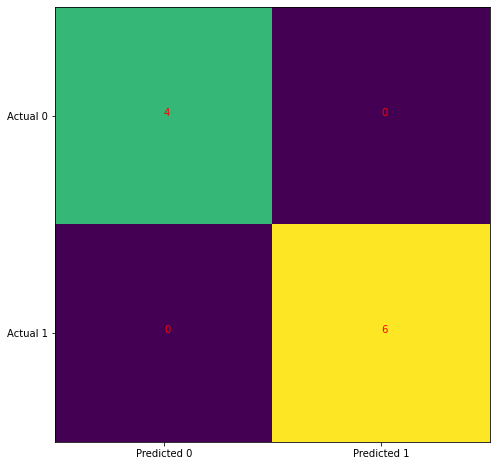

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
        
plt.show()

In [20]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Logistic Regression Example 2

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
x, y = load_digits(return_X_y=True)

In [24]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()

In [45]:
x_train = scaler.fit_transform(x_train)

In [47]:
model = LogisticRegression()

In [48]:
model.fit(x_train, y_train)

LogisticRegression()

In [49]:
x_test = scaler.transform(x_test)

In [50]:
y_pred = model.predict(x_test)

In [52]:
model.score(x_test, y_test)

0.9722222222222222

In [51]:
confusion_matrix(y_test, y_pred)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

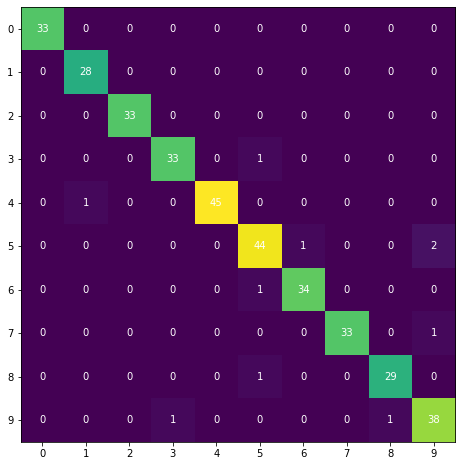

In [55]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))

for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], color='white', ha='center', va='center')
        
plt.show()

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## KNN

In [57]:
from sklearn import datasets

wine = datasets.load_wine()

In [58]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [59]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [60]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [61]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [62]:
wine.data.shape

(178, 13)

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7222222222222222

In [71]:
# k = 13
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [72]:
accuracy_score(y_test, y_pred)

0.7592592592592593

In [73]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [75]:
print(error)

[0.3333333333333333, 0.3148148148148148, 0.2962962962962963, 0.2962962962962963, 0.2777777777777778, 0.2962962962962963, 0.2777777777777778, 0.2777777777777778, 0.2777777777777778, 0.25925925925925924, 0.2777777777777778, 0.25925925925925924, 0.24074074074074073, 0.2777777777777778, 0.2777777777777778, 0.2777777777777778, 0.3333333333333333, 0.2962962962962963, 0.2777777777777778, 0.2777777777777778, 0.2962962962962963, 0.25925925925925924, 0.2777777777777778, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.24074074074074073, 0.24074074074074073, 0.25925925925925924]


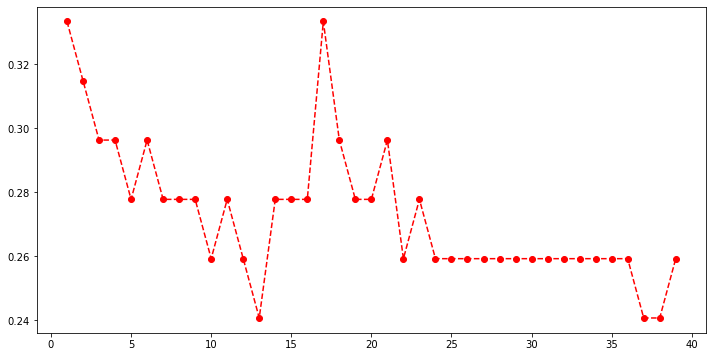

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o')

plt.show()

In [86]:
# k = 13
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [87]:
accuracy_score(y_test, y_pred)

0.7592592592592593